# Homework 1

In [534]:
# imports
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import os
import shutil
from pathlib import Path

### 1.0

Create a Series with the temperature values for the last 14 days in Boston. Use the pandas 'date_range' function to create the index.

In [535]:
#Creating temperature data
temp_data = [random.uniform(10, 40) for _ in range(14)]
# Generating date range for the last 14 days
Boston_date_range = pd.date_range(end=pd.Timestamp.now().date(), periods=14, freq='D')
# Creating a Pandas Series with temperature values and date index
Boston_df = pd.Series(temp_data, index=Boston_date_range)
# Displaying the result
print(Boston_df)

2024-01-19    32.389378
2024-01-20    24.862279
2024-01-21    33.713388
2024-01-22    19.092682
2024-01-23    29.954121
2024-01-24    31.791933
2024-01-25    17.307420
2024-01-26    17.266305
2024-01-27    30.541621
2024-01-28    19.332105
2024-01-29    25.989508
2024-01-30    32.149631
2024-01-31    36.671907
2024-02-01    18.973881
Freq: D, dtype: float64


### 1.1

Filter out the values below the mean (of the Series created in 1.0)

In [536]:
# Applying filter
mean_temp = Boston_df.mean()
filtered_temp_series = Boston_df[Boston_df >= mean_temp]

print(filtered_temp_series)

2024-01-19    32.389378
2024-01-21    33.713388
2024-01-23    29.954121
2024-01-24    31.791933
2024-01-27    30.541621
2024-01-30    32.149631
2024-01-31    36.671907
dtype: float64


In [537]:
SFO_temp_data = [random.uniform(25, 90) for _ in range(20)]
SFO_date_range = pd.date_range(end=pd.Timestamp.now().date(), periods=20, freq='D')
SFO_df = pd.Series(SFO_temp_data, index=SFO_date_range)[::2]

# Displaying the result
print(SFO_df)

2024-01-13    46.119045
2024-01-15    36.836112
2024-01-17    56.272489
2024-01-19    89.363078
2024-01-21    52.886696
2024-01-23    26.300027
2024-01-25    26.595460
2024-01-27    88.637813
2024-01-29    65.189551
2024-01-31    88.271376
Freq: 2D, dtype: float64


### 1.3

Calculate the temperature difference between Boston (1.0) and San Francisco (1.2) per day. Programatically find the day with the highest difference. Fill in the blanks:

In [538]:
# Calculating temperature difference per day
temp_difference = Boston_df - SFO_df

# Finding the day with the highest difference
max_diff_day = temp_difference.idxmax()
max_diff_value = temp_difference.max()

# Displaying the result
print("Temp Diff per Day:")
print(temp_difference)
print("\nDay with the Highest Difference:")
print(f"Date: {max_diff_day}, Temp Diff: {max_diff_value}")

Temp Diff per Day:
2024-01-13          NaN
2024-01-15          NaN
2024-01-17          NaN
2024-01-19   -56.973700
2024-01-20          NaN
2024-01-21   -19.173308
2024-01-22          NaN
2024-01-23     3.654094
2024-01-24          NaN
2024-01-25    -9.288041
2024-01-26          NaN
2024-01-27   -58.096192
2024-01-28          NaN
2024-01-29   -39.200043
2024-01-30          NaN
2024-01-31   -51.599469
2024-02-01          NaN
dtype: float64

Day with the Highest Difference:
Date: 2024-01-23 00:00:00, Temp Diff: 3.6540942457385164


### 1.4

Find the maximum and minimum temperatures for Boston and San Francisco. Fill in the blanks:

In [539]:
# Finding the maximum and minimum temperatures for Boston
max_temp_boston = Boston_df.max()
min_temp_boston = Boston_df.min()

# Finding the maximum and minimum temperatures for San Francisco
max_temp_sfo = SFO_df.max()
min_temp_sfo = SFO_df.min()

# Displaying the result
print("Boston Temperatures:")
print(f"Max Temp: {max_temp_boston}")
print(f"Min Temp: {min_temp_boston}")

print("\nSan Francisco Temperatures:")
print(f"Max Temp: {max_temp_sfo}")
print(f"Min temp: {min_temp_sfo}")


Boston Temperatures:
Max Temp: 36.67190699261279
Min Temp: 17.26630520160657

San Francisco Temperatures:
Max Temp: 89.36307816315082
Min temp: 26.300027118095077


### 1.5

Plot the temperatures in Boston and San Francisco in one chart.

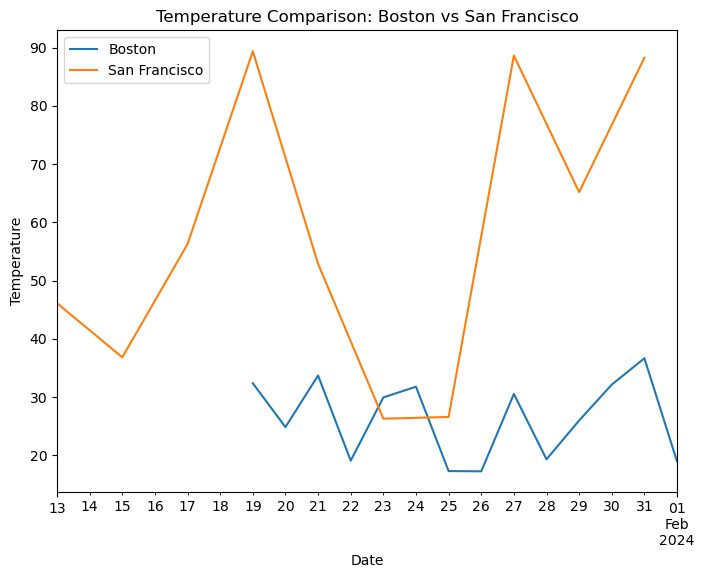

In [540]:
# Plotting the temperatures in one chart
plt.figure(figsize=(8, 6))
Boston_df.plot(label='Boston')
SFO_df.plot(label='San Francisco')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Comparison: Boston vs San Francisco')
plt.legend()

# Displaying the plot
plt.show()

### 2.1

Create a Dataframe with the names of your team members, their age, their favorite food, their favorite room temperature

In [541]:
# Data for the team members
team_data = {
    'Name': ['Cezer', 'Aniel', 'Christiana', 'Khau'],
    'Age': [25, 21, 22, 22],
    'FavoriteFood': ['Steak', 'Steak', 'Salmon', 'Wings'],
    'FavRoomTemp': [69, 68, 70, 73]
}

team_df = pd.DataFrame(team_data)
print(team_df)

         Name  Age FavoriteFood  FavRoomTemp
0       Cezer   25        Steak           69
1       Aniel   21        Steak           68
2  Christiana   22       Salmon           70
3        Khau   22        Wings           73


### 2.2

Filter the dataframe for only the two oldest team members

In [542]:
# Filtering for the two oldest team members
oldest_members_df = team_df.nlargest(2, 'Age')
print(oldest_members_df)

         Name  Age FavoriteFood  FavRoomTemp
0       Cezer   25        Steak           69
2  Christiana   22       Salmon           70


### 2.3

Which team member is closest in favorite temperature to the 3rd percentil? Output his or her data.

In [543]:
# Calculating the 3rd percentile of the 'FavoriteRoomTemperature' column
third_per_temp = team_df['FavRoomTemp'].quantile(0.03)
# Finding the team member closest to the 3rd percentile temperature
closest_member_df = team_df.iloc[(team_df['FavRoomTemp'] - third_per_temp).abs().argsort()[:1]]
# Displaying the data for the closest team member
print("Team member closest to the 3rd percentile:")
print(closest_member_df)

Team member closest to the 3rd percentile:
    Name  Age FavoriteFood  FavRoomTemp
1  Aniel   21        Steak           68


### 2.4

Get the 2nd and 3rd team members' favorite foods

In [544]:
# 2nd and 3rd team members and their favorite foods
selected_members_df = team_df.loc[1:2, ['Name', 'FavoriteFood']]

# Result
print("Fav foods of the 2nd & 3rd team members:")
print(selected_members_df)

Fav foods of the 2nd & 3rd team members:
         Name FavoriteFood
1       Aniel        Steak
2  Christiana       Salmon


### 2.5

Add 2 degrees to the favorite room temperature of the oldest two team members

In [545]:
# Identifying the indices of the two oldest team members
oldest_members_indices = team_df.nlargest(2, 'Age').index

# Adding 2 degrees to the favorite room temperature of the oldest two team members
team_df.loc[oldest_members_indices, 'FavRoomTemp'] += 2

# Displaying the updated DataFrame
print("Updated DataFrame with 2 degrees added to the fav room temp of the oldest two team members:")
print(team_df)

Updated DataFrame with 2 degrees added to the fav room temp of the oldest two team members:
         Name  Age FavoriteFood  FavRoomTemp
0       Cezer   25        Steak           71
1       Aniel   21        Steak           68
2  Christiana   22       Salmon           72
3        Khau   22        Wings           73


## 3.0

Load the coaster_db.csv dataset

In [546]:
# I constructed a relative file path, as advised in class, using the Path class
path = Path('data') / 'coaster_db.csv'

# Then loaded the CSV dataset into a DataFrame
coaster_df = pd.read_csv(path, low_memory=False)

# And finally displayed the first few rows of the DataFrame to see if it loaded properly
coaster_df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


## 3.1
Store the coaster dataset in a new database. Ensure to handle duplicate column names.

In [547]:
# First I removed any duplicate columns

coaster_df.columns = [column.upper() for column in coaster_df.columns]
coaster_df = coaster_df.drop(columns = coaster_df.columns[coaster_df.columns.duplicated()])

# Now I want to see the column names just to confirm for myself 
coaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   COASTER_NAME                   1087 non-null   object 
 1   LENGTH                         953 non-null    object 
 2   SPEED                          937 non-null    object 
 3   LOCATION                       1087 non-null   object 
 4   STATUS                         874 non-null    object 
 5   OPENING DATE                   837 non-null    object 
 6   TYPE                           1087 non-null   object 
 7   MANUFACTURER                   1028 non-null   object 
 8   HEIGHT RESTRICTION             831 non-null    object 
 9   MODEL                          744 non-null    object 
 10  HEIGHT                         965 non-null    object 
 11  INVERSIONS                     932 non-null    float64
 12  LIFT/LAUNCH SYSTEM             795 non-null    o

In [548]:
# Satisfied, I stored the coaster dataset in a new database

import sqlite3

# Connect to a SQLite database (creates a new one if it doesn't exist)
connect = sqlite3.connect('coaster_database.db')

# Store the DataFrame in the database
coaster_df.to_sql('coaster_table', connect, index=False, if_exists='replace')

# Close the connection
connect.close()

In [549]:
coaster_df.head()

,COASTER_NAME,LENGTH,SPEED,LOCATION,STATUS,OPENING DATE,TYPE,MANUFACTURER,HEIGHT RESTRICTION,MODEL,...,SPEED1,SPEED2,SPEED1_VALUE,SPEED1_UNIT,SPEED_MPH,HEIGHT_VALUE,HEIGHT_UNIT,HEIGHT_FT,INVERSIONS_CLEAN,GFORCE_CLEAN
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


## 4.0

Clean the dataset coaster dataset.

- Ensure all columns only have one unit
- Ensure dates are as datetime
- Ensure boolean information is stored as boolean
- Only retain the following columns:
    - coaster_name
    - Length
    - Speed
    - Location
    - Status
    - Manufacturer
    - Height
    - Designer
    - Track layout
    - latitude
    - longitude
    - opening_date_clean
    - speed_mph
    - height_value
- Ensure the column names are descriptive, contain no blank spaces and have the same capitalization

In [550]:
print(coaster_df.columns)

Index(['COASTER_NAME', 'LENGTH', 'SPEED', 'LOCATION', 'STATUS', 'OPENING DATE',
       'TYPE', 'MANUFACTURER', 'HEIGHT RESTRICTION', 'MODEL', 'HEIGHT',
       'INVERSIONS', 'LIFT/LAUNCH SYSTEM', 'COST', 'TRAINS', 'PARK SECTION',
       'DURATION', 'CAPACITY', 'G-FORCE', 'DESIGNER', 'MAX VERTICAL ANGLE',
       'DROP', 'SOFT OPENING DATE', 'FAST LANE AVAILABLE', 'REPLACED',
       'TRACK LAYOUT', 'FASTRACK AVAILABLE', 'SOFT OPENING DATE.1',
       'CLOSING DATE', 'OPENED', 'REPLACED BY', 'WEBSITE',
       'MUST TRANSFER FROM WHEELCHAIR', 'THEME', 'SINGLE RIDER LINE AVAILABLE',
       'RESTRAINT STYLE', 'ACCELERATION', 'RESTRAINTS', 'NAME',
       'YEAR_INTRODUCED', 'LATITUDE', 'LONGITUDE', 'TYPE_MAIN',
       'OPENING_DATE_CLEAN', 'SPEED1', 'SPEED2', 'SPEED1_VALUE', 'SPEED1_UNIT',
       'SPEED_MPH', 'HEIGHT_VALUE', 'HEIGHT_UNIT', 'HEIGHT_FT',
       'INVERSIONS_CLEAN', 'GFORCE_CLEAN'],
      dtype='object')


In [551]:
# Ensure dates are in datetime format
coaster_df['OPENING_DATE_CLEAN'] = pd.to_datetime(coaster_df['OPENING_DATE_CLEAN'], errors='coerce')

# Convert boolean information to boolean type
boolean_columns = ['STATUS']
coaster_df[boolean_columns] = coaster_df[boolean_columns].astype(bool)

# Rename and retain only the specified columns
columns_to_retain = [
    'COASTER_NAME', 'LENGTH', 'SPEED', 'LOCATION', 'STATUS',
    'MANUFACTURER', 'HEIGHT', 'DESIGNER', 'TRACK LAYOUT',
    'LATITUDE', 'LONGITUDE', 'OPENING_DATE_CLEAN',
    'SPEED_MPH', 'HEIGHT_VALUE'
]

coaster_df = coaster_df[columns_to_retain]

# Clean column names
coaster_df.columns = coaster_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Display the first few rows of the cleaned DataFrame
coaster_df.head()


,coaster_name,length,speed,location,status,manufacturer,height,designer,track_layout,latitude,longitude,opening_date_clean,speed_mph,height_value
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,True,LaMarcus Adna Thompson,50 ft (15 m),LaMarcus Adna Thompson,Gravity pulled coaster,40.5740,-73.9780,1884-06-16,6.0,50.0
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,True,Lina Beecher,NaN,Lina Beecher,NaN,40.5780,-73.9790,1895-01-01,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",True,NaN,NaN,NaN,NaN,41.5800,-81.5700,NaT,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,True,Edwin Prescott,NaN,Edward A. Green,NaN,40.5745,-73.9780,1901-01-01,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,True,Edwin Prescott,NaN,Edward A. Green,NaN,39.3538,-74.4342,1901-01-01,NaN,NaN


## 4.1

Add a column giving the average speed per height

In [552]:
coaster_df['speed_mph'] = pd.to_numeric(coaster_df['speed_mph'], errors='coerce')
coaster_df['height'] = pd.to_numeric(coaster_df['height'], errors='coerce')
coaster_df['avg_speed_per_height']= coaster_df['speed_mph']/coaster_df['height']
coaster_df.head()

,coaster_name,length,speed,location,status,manufacturer,height,designer,track_layout,latitude,longitude,opening_date_clean,speed_mph,height_value,avg_speed_per_height
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,True,LaMarcus Adna Thompson,NaN,LaMarcus Adna Thompson,Gravity pulled coaster,40.5740,-73.9780,1884-06-16,6.0,50.0,NaN
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,True,Lina Beecher,NaN,Lina Beecher,NaN,40.5780,-73.9790,1895-01-01,NaN,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",True,NaN,NaN,NaN,NaN,41.5800,-81.5700,NaT,NaN,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,True,Edwin Prescott,NaN,Edward A. Green,NaN,40.5745,-73.9780,1901-01-01,NaN,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,True,Edwin Prescott,NaN,Edward A. Green,NaN,39.3538,-74.4342,1901-01-01,NaN,NaN,NaN


In [553]:
coaster_df.tail()

,coaster_name,length,speed,location,status,manufacturer,height,designer,track_layout,latitude,longitude,opening_date_clean,speed_mph,height_value,avg_speed_per_height
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,True,Anton Schwarzkopf,NaN,Werner Stengel,NaN,NaN,NaN,NaT,53.0,111.0,NaN
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,True,Intamin,NaN,NaN,NaN,37.2339,-76.6426,2022-01-01,73.0,178.0,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,True,Vekoma,NaN,Walt Disney Imagineering,NaN,NaN,NaN,2016-06-16,59.3,78.1,NaN
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,True,S&S – Sansei Technologies,NaN,NaN,NaN,NaN,NaN,NaT,34.0,112.0,NaN
1086,Wonder Woman Flight of Courage,"3,300 ft (1,000 m)",58 mph (93 km/h),Six Flags Magic Mountain,True,Rocky Mountain Construction,NaN,NaN,NaN,NaN,NaN,2022-01-01,58.0,131.0,NaN


## 4.2
Find the total number of empty values

In [554]:
# Finding the total number of empty values in the DataFrame
empty_values_total = coaster_df.isna().sum().sum()

print(f'Total no.of empty values in the DataFrame: {empty_values_total}')

Total no.of empty values in the DataFrame: 4850


## 4.3
Find the duplicated coasters and remove them

In [555]:
# Find duplicates based on the 'coaster_name' column
coaster_duplicate = coaster_df[coaster_df.duplicated('coaster_name', keep=False)]

# Display the duplicate coasters
print("Duplicate Coaster:")
print(coaster_duplicate)

# Remove duplicates and keep the first occurrence
coaster_df = coaster_df.drop_duplicates('coaster_name', keep='first')

# Display the first few rows of the DataFrame after removing duplicates
coaster_df.head()

Duplicate Coaster:
                            coaster_name                length  \
14                           Derby Racer                   NaN   
16                         Zippin Pippin      2,865 ft (873 m)   
39                 Crystal Beach Cyclone      2,953 ft (900 m)   
43                 Crystal Beach Cyclone      2,953 ft (900 m)   
59           Blue Streak (Conneaut Lake)      2,900 ft (880 m)   
...                                  ...                   ...   
1063                  Lil' Devil Coaster     262.5 ft (80.0 m)   
1064  Little Dipper (Conneaut Lake Park)                   NaN   
1080                          Iron Gwazi    4,075 ft (1,242 m)   
1082             American Dreier Looping    3,444 ft (1,050 m)   
1084           Tron Lightcycle Power Run  3,169.3 ft (966.0 m)   

                        speed                   location  status  \
14                        NaN               Revere Beach    True   
16           40 mph (64 km/h)                      O

,coaster_name,length,speed,location,status,manufacturer,height,designer,track_layout,latitude,longitude,opening_date_clean,speed_mph,height_value,avg_speed_per_height
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,True,LaMarcus Adna Thompson,NaN,LaMarcus Adna Thompson,Gravity pulled coaster,40.5740,-73.9780,1884-06-16,6.0,50.0,NaN
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,True,Lina Beecher,NaN,Lina Beecher,NaN,40.5780,-73.9790,1895-01-01,NaN,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",True,NaN,NaN,NaN,NaN,41.5800,-81.5700,NaT,NaN,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,True,Edwin Prescott,NaN,Edward A. Green,NaN,40.5745,-73.9780,1901-01-01,NaN,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,True,Edwin Prescott,NaN,Edward A. Green,NaN,39.3538,-74.4342,1901-01-01,NaN,NaN,NaN


## 4.4
What is the average coaster length per decade?

In [556]:
# Convert 'OpeningDate' to datetime if it's not already
coaster_df['opening_date_clean'] = pd.to_datetime(coaster_df['opening_date_clean'], errors='coerce')

# Extract only the numeric part from the 'Length_ft' column
coaster_df['length'] = coaster_df['length'].str.extract(r'(\d+)').astype(float)

# Extract the year from 'OpeningDate' and compute the decade
coaster_df['Decade'] = (coaster_df['opening_date_clean'].dt.year // 10) * 10

# Group by decade and calculate the average length
avg_length_per_decade = coaster_df.groupby('Decade')['length'].mean()

# Display the result
print(avg_length_per_decade)

Decade
1880.0    600.000000
1890.0           NaN
1900.0      1.000000
1910.0    484.000000
1920.0     32.760000
1930.0    253.166667
1940.0      2.666667
1950.0    146.000000
1960.0     75.727273
1970.0     49.490566
1980.0    167.106667
1990.0    116.032468
2000.0    152.469388
2010.0    171.269006
2020.0    100.000000
Name: length, dtype: float64


## 4.5
Find the median speed per Designer

In [557]:
# Ensure that 'Speed_mph' is in a numeric format
coaster_df['speed_mph'] = pd.to_numeric(coaster_df['speed_mph'], errors='coerce')

# Group by 'Designer' and calculate the median speed
Median_Speed_Per_Designer = coaster_df.groupby('designer')['speed_mph'].median()

# Display the result
print(Median_Speed_Per_Designer)

designer
Al CollinsJeff Gramke                              64.8
Alan Schilke                                       56.0
Alan SchilkeRenato Manzoni                         76.0
Alison Brittle, Eden Carpenter, and Gary Norton    50.0
Andy Vettel (1968)John A. Miller (1924)            55.0
                                                   ... 
Werner Stengel[3]                                  92.0
William Cobb                                       58.0
William Cobb & Associates                          59.7
William CobbWerner Stengel                         62.1
Zierer                                             22.4
Name: speed_mph, Length: 153, dtype: float64


## 4.6
What is the active coaster length per location? Sort high-to-low.

In [558]:
# Assuming 'Status' is a boolean column indicating whether the coaster is active
active_coasters = coaster_df[coaster_df['status']]

# Grouping by location and calculate the total length for active coasters
active_coaster_leng_per_loc = active_coasters.groupby('location')['length'].sum()

# Sorting the result from high to low
sorted_active_coaster_leng_per_loc = active_coaster_leng_per_loc.sort_values(ascending=False)

# Displaying the result
print("Active Coaster Leng per Loc (High to Low):")
print(sorted_active_coaster_leng_per_loc)

Active Coaster Leng per Loc (High to Low):
location
Other                                                  22041.0
Walibi Holland                                          5840.0
Canada's Wonderland                                     4468.0
Alton Towers                                            3955.0
Movie Park Germany                                      3076.0
                                                        ...   
Castles N' Coasters                                        0.0
Camden Park                                                0.0
Calaway Park                                               0.0
Tolchester Beach Park                                      0.0
2904 Fantasy Way Myrtle Beach, South Carolina, U.S.        0.0
Name: length, Length: 280, dtype: float64


## 4.7
Which manufaturer had the heighest active amount of coaster length each decade?

In [559]:
# Filtering out only active coasters
active_coasters = coaster_df[coaster_df['status']]

# Extracting the decade from the 'Opening_Date_Clean' column
active_coasters['decade'] = (active_coasters['opening_date_clean'].dt.year // 10) * 10

# Grouping by decade and manufacturer, calculate the total length for each combination
manuf_leng_per_decade = active_coasters.groupby(['decade', 'manufacturer'])['length'].sum()

# Finding the manufacturer with the highest total length for each decade
manuf_with_highest_leng_per_decade = manuf_leng_per_decade.groupby('decade').idxmax().apply(lambda x: x[1])

# Displaying the result
print("Manuf with Highest Active Coaster Leng Each Decade:")
print(manuf_with_highest_leng_per_decade)

Manuf with Highest Active Coaster Leng Each Decade:
decade
1880.0                LaMarcus Adna Thompson
1890.0                          Lina Beecher
1900.0          Federal Construction Company
1910.0                     LaMarcus Thompson
1920.0                    Traver Engineering
1930.0        Philadelphia Toboggan Coasters
1940.0        Philadelphia Toboggan Coasters
1950.0    Linnanmäki, led by Svend Jarlström
1960.0                        Arrow Dynamics
1970.0                     Anton Schwarzkopf
1980.0                                Vekoma
1990.0                                Vekoma
2000.0                                Vekoma
2010.0                            Gerstlauer
2020.0                            Mack Rides
Name: length, dtype: object


## 4.8
What is the favorite track layout and how does it change over time? Show in a plot. Which layout is most expensive?

In [560]:
track_layout_counts = coaster_df['track_layout'].value_counts()

fav_track_layout = track_layout_counts.idxmax()

print("The fav track layout is:", favorite_track_layout)

The fav track layout is: Terrain


In [561]:
def calculate_decade(date):
    return (date.year // 10) * 10

In [562]:
coaster_df=coaster_df.copy()

C:\Users\Aravind kumar\AppData\Local\Temp\ipykernel_31160\688325610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrain_coasters.loc[:, 'decade'] = terrain_coasters['opening_date_clean'].apply(calculate_decade)


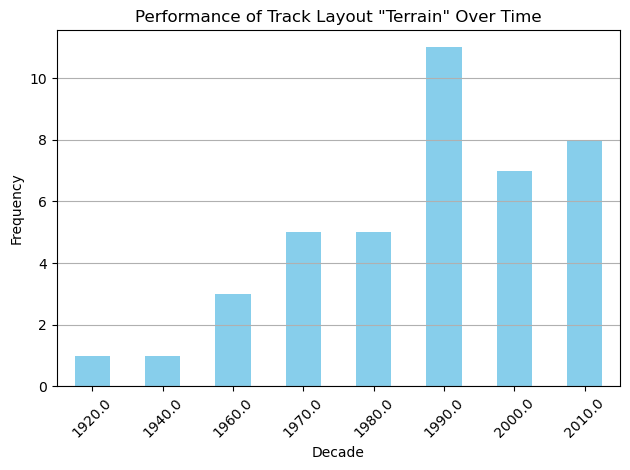

In [565]:
terrain_coasters = coaster_df[coaster_df['track_layout'] == 'Terrain']

terrain_coasters.loc[:, 'decade'] = terrain_coasters['opening_date_clean'].apply(calculate_decade)
terrain_coasters_per_decade = terrain_coasters.groupby('decade').size()
terrain_coasters_per_decade.plot(kind='bar', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.title('Performance of Track Layout "Terrain" Over Time')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 5.0
Using the earthquake data: Which coaster was closest to an earthquake that happened in the last 90 days?

- load the earthquake data
- calculate the distances as:
    - distance = square root((Latitude1 - Latitude2) **2 + (Longitude1 - Longitude2) **2)
- Print the coaster information and how far away it was from the closes earthquake

In [564]:
# Loading the earthquake dataset using a relative path
path_earthquake = Path('data') / 'earthquake.csv'
df_earthquake = pd.read_csv(path_earthquake)

# Converting earthquake dates to datetime
df_earthquake['time'] = pd.to_datetime(df_earthquake['time'])

# Filtering earthquakes in the last 90 days
last_90_days = datetime.now() - timedelta(days=90)
recent_earthquakes = df_earthquake[df_earthquake['time'] >= last_90_days]

# Function to calculate distance between two points
def calculate_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

# Initialize variables to store closest earthquake information
earthquake_distance_closest = float('inf')
earthquake_info_closest = None

# Iterate through each coaster and find the closest earthquake
for coaster_index, coaster_row in coaster_df.iterrows():
    coaster_latitude = coaster_row['latitude']
    coaster_longitude = coaster_row['longitude']

    for earthquake_index, earthquake_row in recent_earthquakes.iterrows():
        earthquake_latitude = earthquake_row['latitude']
        earthquake_longitude = earthquake_row['longitude']

        distance = calculate_distance(coaster_latitude, coaster_longitude, earthquake_latitude, earthquake_longitude)

        if distance < closest_earthquake_distance:
            earthquake_distance_closest = distance
            earthquake_info_closest = earthquake_row

# Printing information about the closest earthquake to a coaster
if earthquake_info_closest is not None:
    print(f"Closest Earthquake Information:\n{earthquake_info_closest}")
    print(f"Distance to the closest earthquake: {earthquake_distance_closest} units")
else:
    print("No recent earthquakes found")


No recent earthquakes found
